# Getting started with Matplotlib
Introduction to Matplotlib's most useful and most frequently used classes and functions.

In Matplotlib, the *figure* (an instance of the class `plt.Figure`) can be thought of as a single container that contains all the objects representing axes, graphics, text, and labels.
The *axes* (an instance of the class `plt.Axes`) is a bounding box with ticks and labels, which will eventually contain the plot elements that make up the visualization.
The variable name `fig` is typically used to refer to a figure (`plt.Figure` instance), and `ax` to refer to an axes (`plt.Axes`) instance or group of axes instances.

## Import and configure packages
The `%run` magic does not work well in DataSpell, thus the following `import` statements are copied here from *import_packages.ipynb* (the last line is added subsequently):

In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

%config IPCompleter.greedy=True

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.style.use('classic')
import pandas as pd
import seaborn as sb

from plotnine import ggplot, aes, geom_line, geom_histogram, theme_xkcd

In [1]:
# %run "import_packages.ipynb"

## Two "interfaces" (coding idioms) of Matplotlib

Create some simple data to plot:

In [2]:
x = np.linspace(0, 10, 100)

### MATLAB-style (pylab) interface

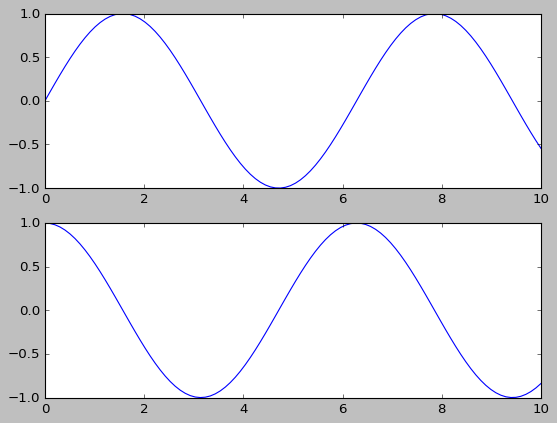

In [3]:
plt.figure()                                              # create a plot figure (just an empty container (plt.Figure object))

# create the first of two panels and set current axis
plt.subplot(2, 1, 1)                                      # (rows, columns, panel number (the first panel, in this case))
plt.plot(x, np.sin(x))                                    # plot a graph in the first panel

# create the second panel and set current axis
plt.subplot(2, 1, 2)                                      # (rows, columns, panel number (the second panel, in this case))
plt.plot(x, np.cos(x));                                   # plot a graph in the first panel; the ';' prevents line output

With MATLAB-style interface, returning the focus from the second panel to the first one is possible, but a bit clunky. It's better to use the object-oriented interface for that purpose.

### Object-oriented interface
`plt.subplots()` creates a grid of plots (axes) and shold be decomposed into a figure and axes.

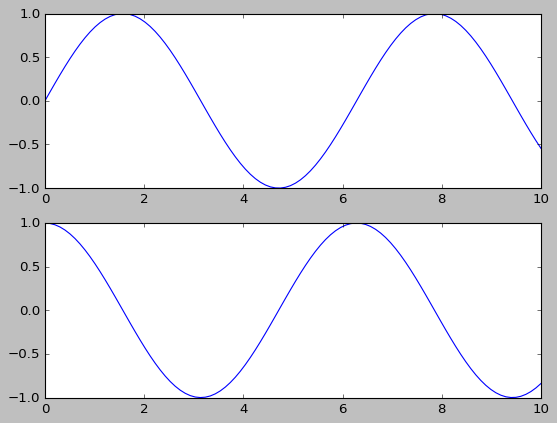

In [4]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, ax = plt.subplots(2)

# Call plot() method on the appropriate Axes object
ax[0].plot(x, np.sin(x))
ax[1].plot(x, np.cos(x));

Alternatively, name each `Axes` object differently in a tuple:

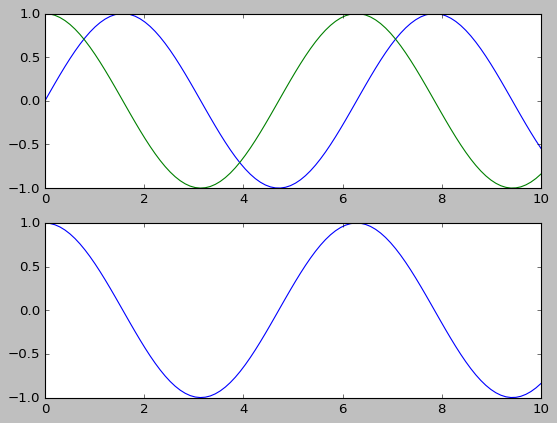

In [5]:
# First create a grid of plots
# ax will be an array of two Axes objects
fig, (ax1, ax2) = plt.subplots(2)

# Call plot() method on the appropriate Axes object
ax1.plot(x, np.sin(x))
ax2.plot(x, np.cos(x))

# Returning the focus to the first plot is now easy
ax1.plot(x, np.cos(x));

### Setting plot style
`plt.style.use()`

[Available styles](https://www.dunderdata.com/blog/view-all-available-matplotlib-styles) (can be shown in code using `plt.style.available`). See also [this](https://www.analyticsvidhya.com/blog/2021/08/exploring-matplotlib-stylesheets-for-data-visualization/).

Plot style can be also set using `sb.set_theme()` (or just `sb.set()`, but that function might get deprecated and removed from *seaborn* in the future). See [`sb_set_theme()` documentation](https://seaborn.pydata.org/generated/seaborn.set_theme.html) for the function's parameters and defaults.

In [71]:
plt.style.available

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

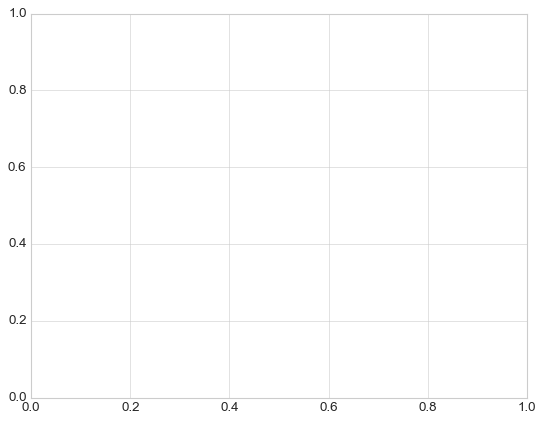

In [56]:
plt.style.use('seaborn-whitegrid')

fig = plt.figure()
# print(type(fig))
ax = plt.axes()

## Simple line plots

Create some simple data to plot:

In [7]:
x = np.linspace(0, 10, 100)

### Setup
`plt.subplots()`, `ax.plot()`, `plt.plot()`

Create a single plot using the object-oriented interface:

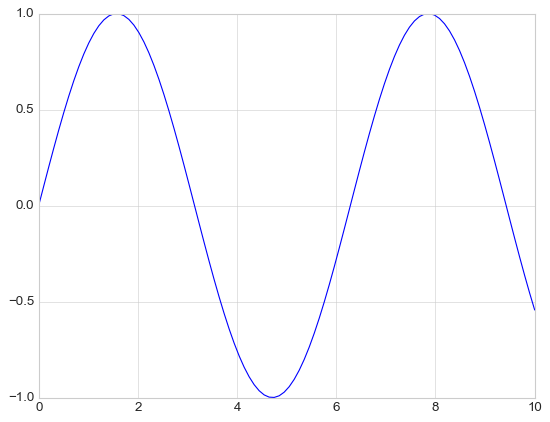

In [8]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x));

Create a single plot using the MATLAB-style (pylab) interface:

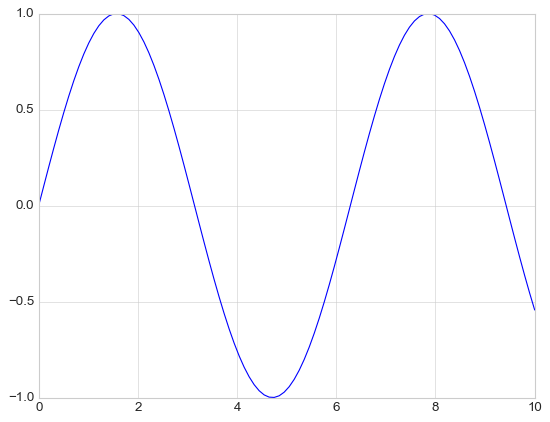

In [9]:
plt.plot(x, np.sin(x));
# plt.plot(x, np.cos(x));                               # this is now OK, since the focus has not been given to another subplot

### Line colors and styles
`color=`, `linestyle=`
If no color is specified, Matplotlib will automatically cycle through a set of default colors for multiple lines.

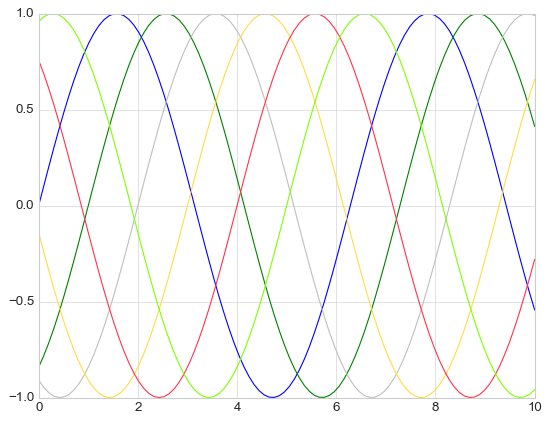

In [10]:
plt.plot(x, np.sin(x - 0), color='blue')        # specify color by name
plt.plot(x, np.sin(x - 1), color='g')           # short color code (rgbcmyk)
plt.plot(x, np.sin(x - 2), color='0.75')        # Grayscale between 0 and 1
plt.plot(x, np.sin(x - 3), color='#FFDD44')     # Hex code (RRGGBB from 00 to FF)
plt.plot(x, np.sin(x - 4), color=(1.0,0.2,0.3)) # RGB tuple, values 0 to 1
plt.plot(x, np.sin(x - 5), color='chartreuse'); # all HTML color names supported

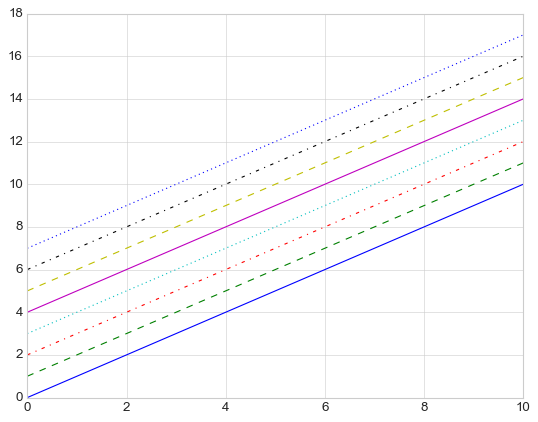

In [12]:
plt.plot(x, x + 0, linestyle='solid')
plt.plot(x, x + 1, linestyle='dashed')
plt.plot(x, x + 2, linestyle='dashdot')
plt.plot(x, x + 3, linestyle='dotted')

# For short, you can use the following codes:
plt.plot(x, x + 4, linestyle='-')  # solid
plt.plot(x, x + 5, linestyle='--') # dashed
plt.plot(x, x + 6, linestyle='-.') # dashdot
plt.plot(x, x + 7, linestyle=':'); # dotted

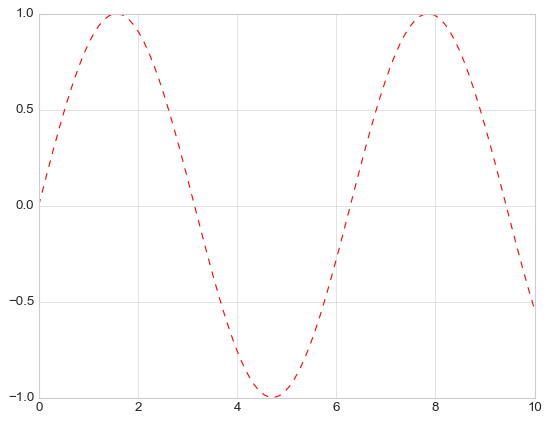

In [13]:
plt.plot(x, np.sin(x), linestyle='dashed', color='r');

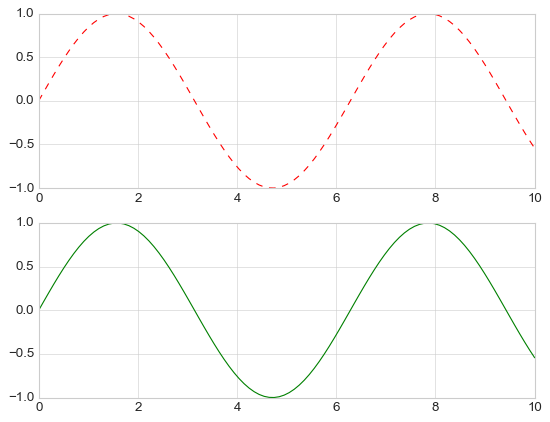

In [14]:
fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(x, np.sin(x), linestyle='dashed', color='r')
ax2.plot(x, np.sin(x), linestyle='-', color='g');

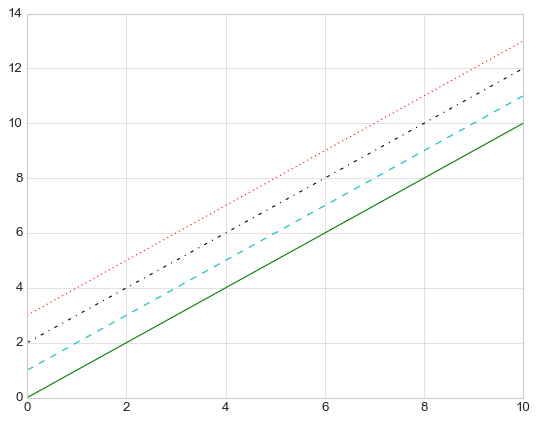

In [15]:
# Combining linestyle and color into one argument
plt.plot(x, x + 0, '-g')  # solid green
plt.plot(x, x + 1, '--c') # dashed cyan
plt.plot(x, x + 2, '-.k') # dashdot black
plt.plot(x, x + 3, ':r'); # dotted red

## Axes limits (boundaries)
`plt.xlim()`, `plt.ylim()`, `plt.axis([xmin, xmax, ymin, ymax])`

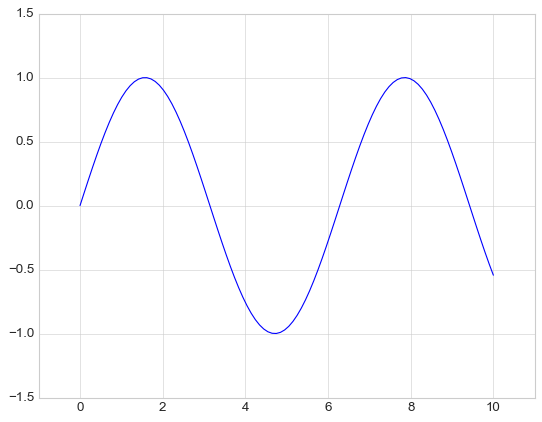

In [16]:
plt.plot(x, np.sin(x))

plt.xlim(-1, 11)
plt.ylim(-1.5, 1.5);

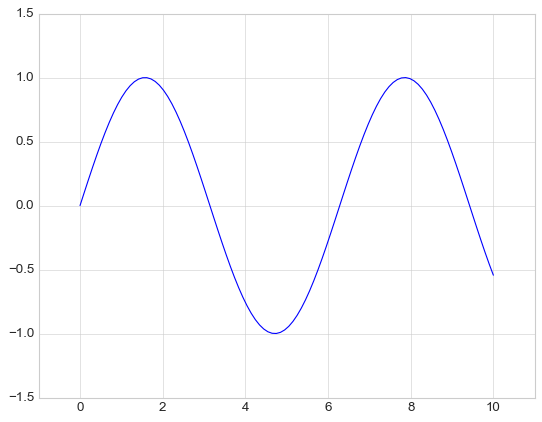

In [17]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))

plt.xlim(-1, 11)                                           # these 2 lines can also go before ax.plot(...)
plt.ylim(-1.5, 1.5);

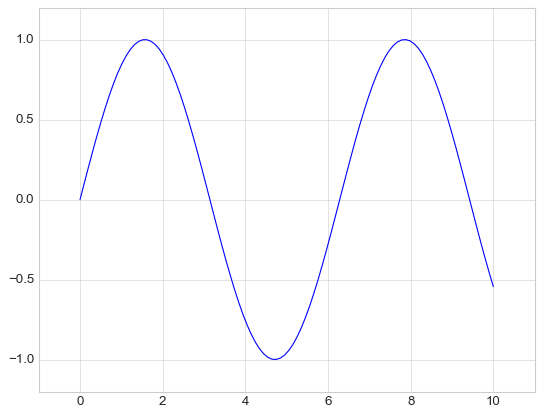

In [18]:
fig, ax = plt.subplots()
ax.plot(x, np.sin(x))
ax.axis([-1, 11, -1.2, 1.2]);

## Labeling plots
`plt.title()`, `plt.xlabel()`, `plt.ylabel()`, `label=`, `plt.legend()`

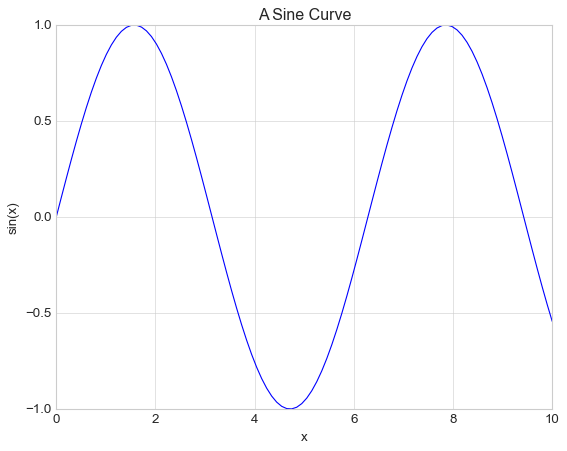

In [19]:
plt.plot(x, np.sin(x))
plt.title("A Sine Curve")
plt.xlabel("x")
plt.ylabel("sin(x)");

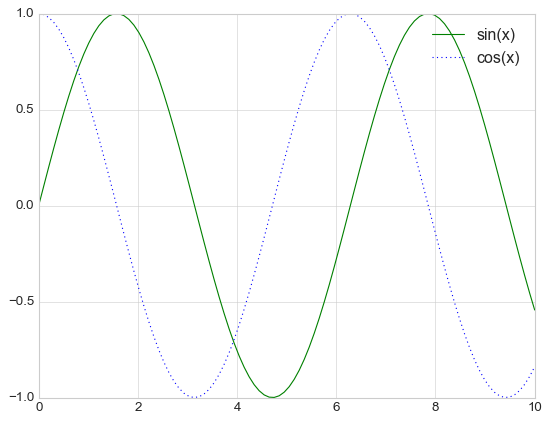

In [20]:
plt.plot(x, np.sin(x), '-g', label='sin(x)')
plt.plot(x, np.cos(x), ':b', label='cos(x)')

plt.legend();

### Translating *plt* functions to *ax* methods using *plt.axes()*
- ``plt.plot()`` → ``ax.plot()``
- ``plt.legend()`` → ``ax.legend()``
- ``plt.xlabel()``  → ``ax.set_xlabel()``
- ``plt.ylabel()`` → ``ax.set_ylabel()``
- ``plt.xlim()``  → ``ax.set_xlim()``
- ``plt.ylim()`` → ``ax.set_ylim()``
- ``plt.title()`` → ``ax.set_title()``

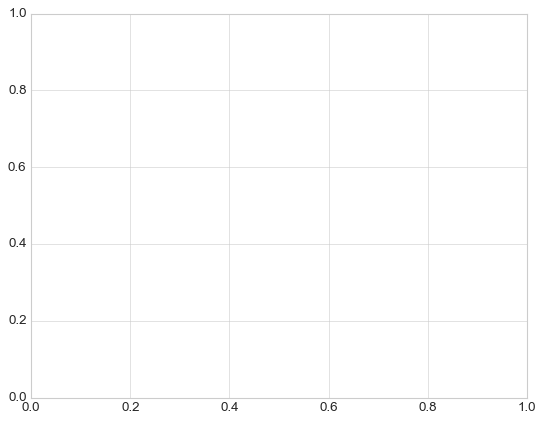

In [21]:
ax = plt.axes()

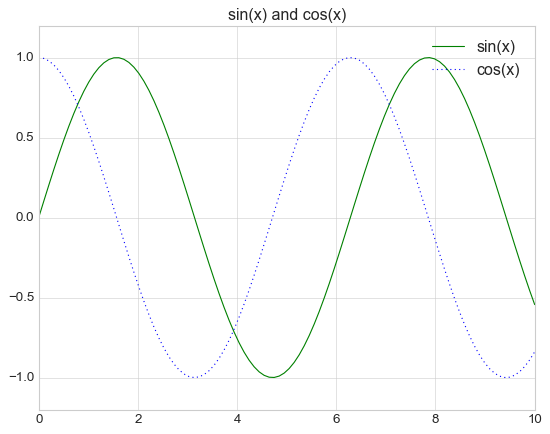

In [25]:
ax = plt.axes()

ax.set_title('sin(x) and cos(x)')
ax.set_xlim(0, 10)
ax.set_ylim(-1.2, 1.2)

ax.plot(x, np.sin(x), '-g', label='sin(x)')
ax.plot(x, np.cos(x), ':b', label='cos(x)')
ax.legend();

### Setting all plot details in one line
`ax.set()`

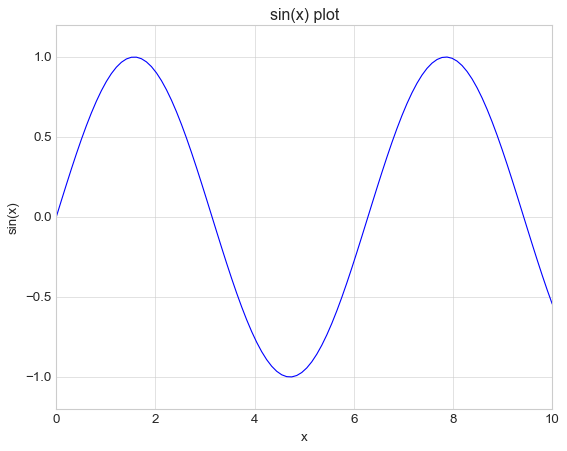

In [23]:
ax = plt.axes()

ax.set(xlim=(0, 10), ylim=(-1.2, 1.2),
       xlabel='x', ylabel='sin(x)',
       title='sin(x) plot')

ax.plot(x, np.sin(x));

### An example from The Beatles dataset
Average song duration by year, from 1962 to 1970.

In [26]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
cols = songs.columns.tolist()
cols

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

In [44]:
# # songs_by_year = songs.groupby('Year').sum()
# # songs_by_year = songs.groupby('Year').sum().reset_index()
# songs_by_year = songs.groupby('Year')
# print(type(songs_by_year))
# print(type(songs_by_year.head()))
# print(songs_by_year.head().shape)
# print(songs.shape)
# # songs_by_year.head()
# songs_by_year.head().sort_values(by='Year', ascending=False)
# # songs_by_year.sort_values(by='Year', ascending=False)



<class 'pandas.core.groupby.generic.DataFrameGroupBy'>
<class 'pandas.core.frame.DataFrame'>
(52, 9)
(310, 9)


,Title,Year,Album.debut,Duration,Other.releases,Genre,Songwriter,Lead.vocal,Top.50.Billboard
210,Real Love,1980,Anthology 2,236,2,"Rock, Pop/Rock","Lennon, with McCartney, Harrison, Starkey",Lennon,47
73,Free as a Bird,1977,Anthology 1,266,0,"Rock, Pop/Rock","Lennon, with McCartney, Harrison and Starkey","Lennon, McCartney and Harrison",39
113,I Me Mine,1970,Let It Be,145,10,"Folk blues, Hard Rock, Pop/Rock",Harrison,Harrison,-1
26,Because I Know You Love Me So,1969,Let It Be... Naked - Fly on the Wall bonus disc,150,0,NaN,"Lennon, McCartney","Lennon, McCartney",-1
27,Because,1969,Abbey Road,165,11,Pop/Rock,Lennon,"Lennon, McCartney, Harrison",-1
36,Carry That Weight,1969,Abbey Road,96,5,"Symphonic Rock, Pop/Rock",McCartney,"McCartney, with Lennon, Harrison and Starkey",-1
44,Come and Get It,1969,Anthology 3,142,0,"Power Pop, Pop/Rock",McCartney,McCartney,-1
10,All Things Must Pass,1969,Anthology 3,227,0,"Folk Rock, Pop/Rock",Harrison,Harrison,-1
22,Back in the U.S.S.R.,1968,The Beatles,163,13,"Rock and Roll, Hard Rock, Pop/Rock",McCartney,McCartney,-1
30,Blackbird,1968,The Beatles,139,12,"Folk, Pop/Rock",McCartney,McCartney,-1


In [45]:
songs_by_year = songs.groupby('Year')
# songs_by_year.head()

years_1962_1970 = np.array(range(1962, 1971))
# years
avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
# avg_duration
avg_duration = np.array(avg_duration)
# avg_duration

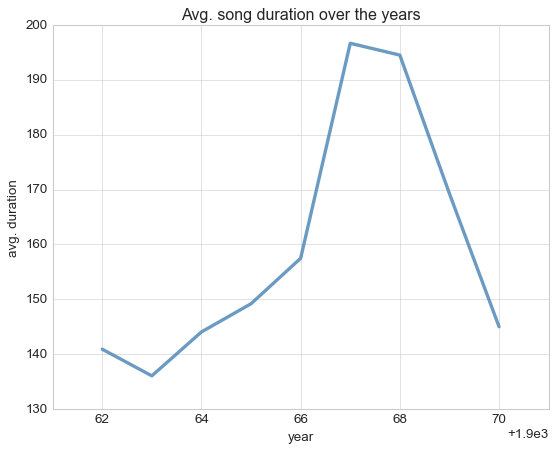

In [46]:
ax = plt.axes()

ax.set(xlim=(1961, 1971), ylim=(130, 200), 
       xlabel='year', ylabel='avg. duration',
       title='Avg. song duration over the years')

# ax.plot(years_1962_1970, avg_duration);
ax.plot(years_1962_1970, avg_duration, color='steelblue', linewidth=3, alpha=0.8);    # alpha: transparency (0-1)

## Simple scatter plots

Create some simple data to plot:

In [47]:
x = np.linspace(0, 10, 30)
y = np.sin(x)

Plot the data using a selected marker shape:

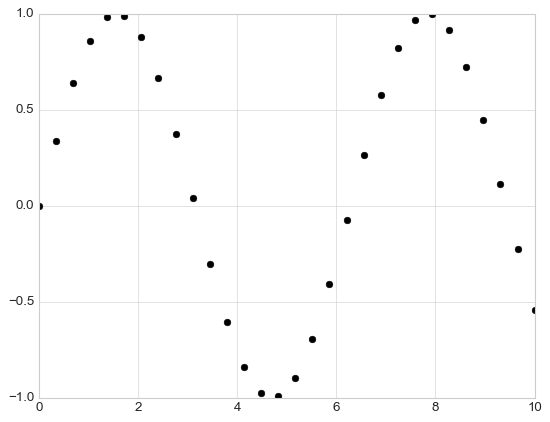

In [50]:
plt.plot(x, y, 'o', color='black');

Plot both the dots and the line:

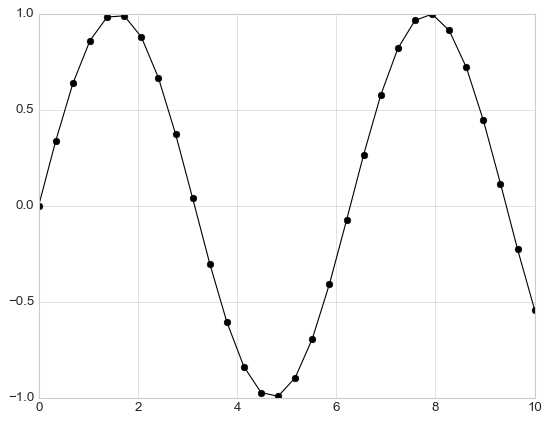

In [51]:
plt.plot(x, y, marker='o', color='black');                                   # alternatively: plt.plot(x, y, '-ok');

Do the same with The Beatles data from above:

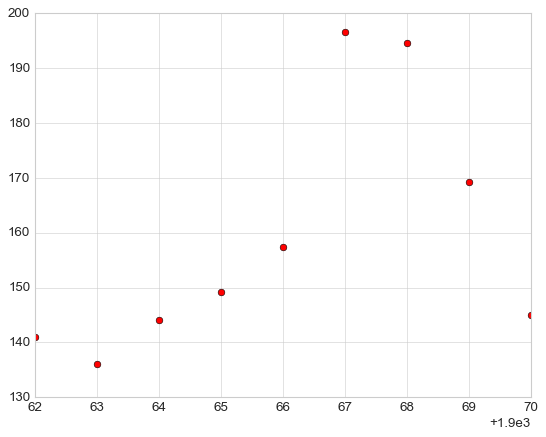

In [52]:
plt.plot(years_1962_1970, avg_duration, 'o', color='red');

Alternatively, using `ax` instead of `plt`:

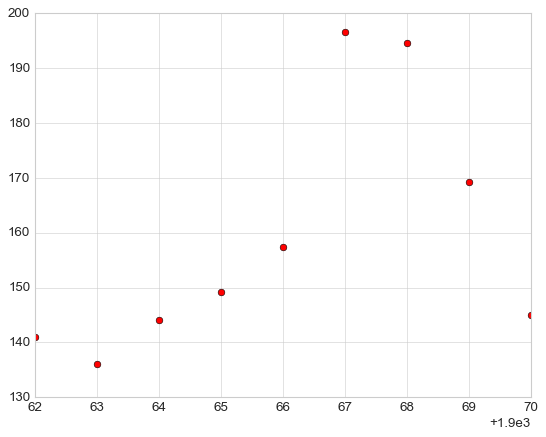

In [53]:
ax = plt.axes()
ax.plot(years_1962_1970, avg_duration, 'o', color='red');

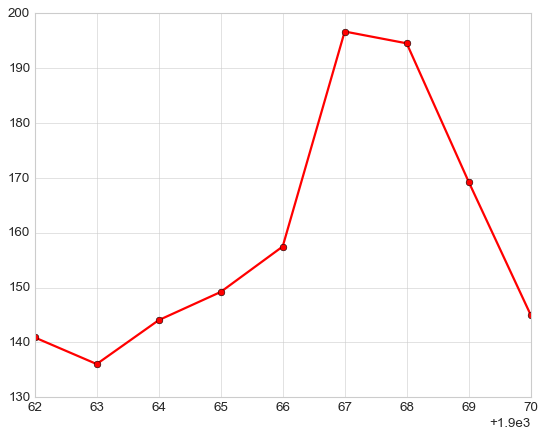

In [57]:
plt.plot(years_1962_1970, avg_duration, marker='o', color='red', linewidth=2);

### Different marker shapes and colors

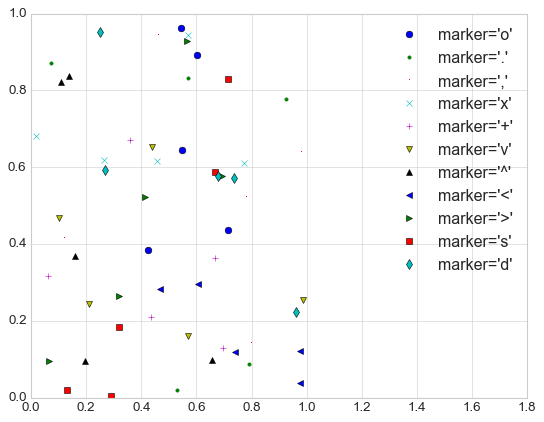

In [58]:
rng = np.random.RandomState(0)
for marker in ['o', '.', ',', 'x', '+', 'v', '^', '<', '>', 's', 'd']:
    plt.plot(rng.rand(5), rng.rand(5), marker,
             label="marker='{0}'".format(marker))
plt.legend(numpoints=1)
plt.xlim(0, 1.8);

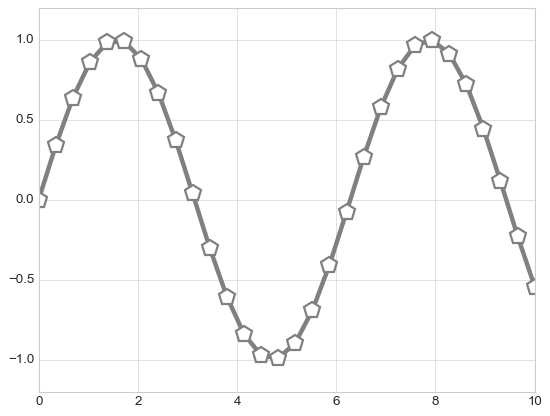

In [59]:
plt.plot(x, y, '-p', color='gray',
         markersize=15, linewidth=4,
         markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2)
plt.ylim(-1.2, 1.2);

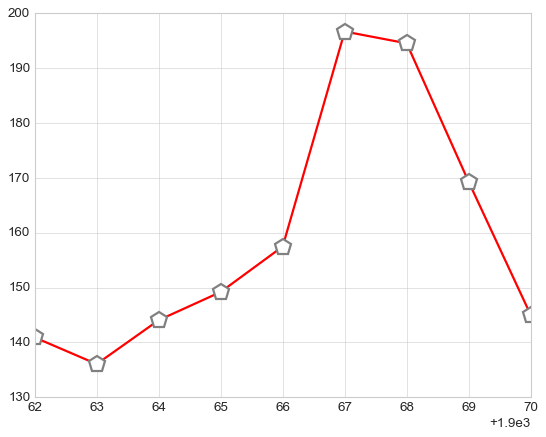

In [60]:
# The same thing with The Beatles data from above
plt.plot(years_1962_1970, avg_duration, '-p', color='red', linewidth=2,
         markersize=15, markerfacecolor='white',
         markeredgecolor='gray',
         markeredgewidth=2);

### *plt.scatter()*
Fancier and more powerful, but less efficient than `plt.plot()` if the dataset is large.<br>
The properties of each individual point (size, face color, edge color, etc.) can be individually controlled or mapped to data.

A simple example:

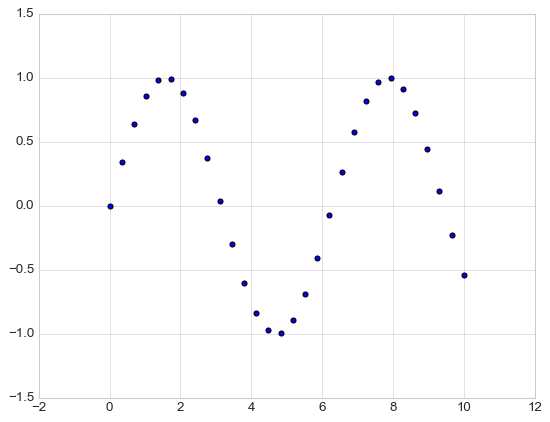

In [62]:
plt.scatter(x, y, marker='o');

The same thing with The Beatles data from above:

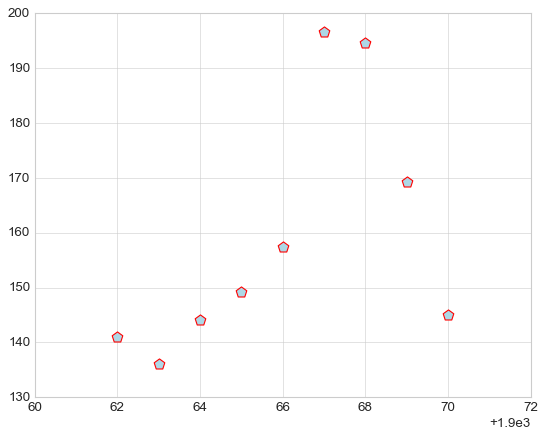

In [63]:
# plt.scatter(years_1962_1970, avg_duration);
plt.scatter(years_1962_1970, avg_duration, 
            marker='p', s=100, c='lightblue', edgecolors='red')   # 'p' - polygon, pentagon; s - size; c - color; edgecolors...

A little fancier example:

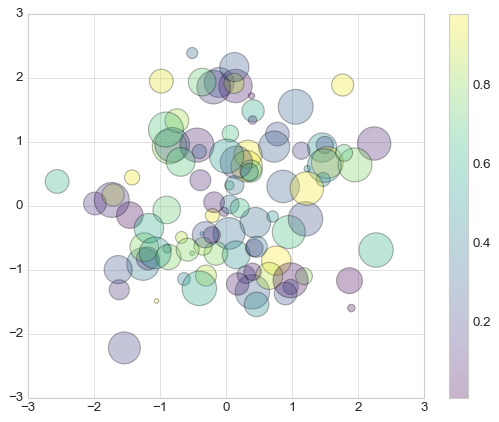

In [64]:
rng = np.random.RandomState(0)
x = rng.randn(100)
y = rng.randn(100)
colors = rng.rand(100)
sizes = 1000 * rng.rand(100)

plt.scatter(x, y, c=colors, s=sizes, alpha=0.3,                               # alpha: the level of transparency
            cmap='viridis')                                                   # cmap: a pre-defined color map
                                                                              # sizes in pixels

# plt.scatter(x, y, c=colors, s=sizes, alpha=1,                               # no transparrency at all
#             cmap='viridis')
# plt.scatter(x, y, c=colors, s=sizes, alpha=0,                               # full transparrency (result: all white)
#             cmap='viridis')

plt.colorbar();                                                               # show color scale

The same thing with The Beatles data:

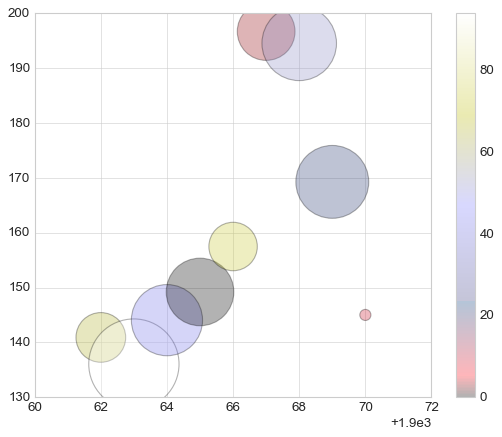

In [65]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
songs_by_year = songs.groupby('Year')
years_1962_1970 = np.array(range(1962, 1971))
avg_duration = []
for year in years_1962_1970:
    avg_duration.append(np.mean(songs_by_year.get_group(year)['Duration']))
avg_duration = np.array(avg_duration)

rng = np.random.RandomState(370)

colors = rng.choice(100, size=len(years_1962_1970), replace=False)            # random sample, no duplicates
# display(colors)

sizes = []
for year in years_1962_1970:
    sizes.append(len(songs_by_year.get_group(year)) * 100)                    # sizes proportional to the numbers of songs

plt.scatter(years_1962_1970, avg_duration, 
            c=colors, s=sizes, alpha=0.3,                                     # alpha: the level of transparency
            cmap='gist_stern')                                                # cmap: a pre-defined color map
plt.colorbar();                                                               # show color scale

The following scatter plot simultaneously explores four different dimensions of the iris dataset: the (x, y) location of each point corresponds to the sepal length and width, the size of the point is related to the petal width, and the color is related to the particular species of flower. Multicolor and multifeature scatter plots like this can be useful for both exploration and presentation of data.

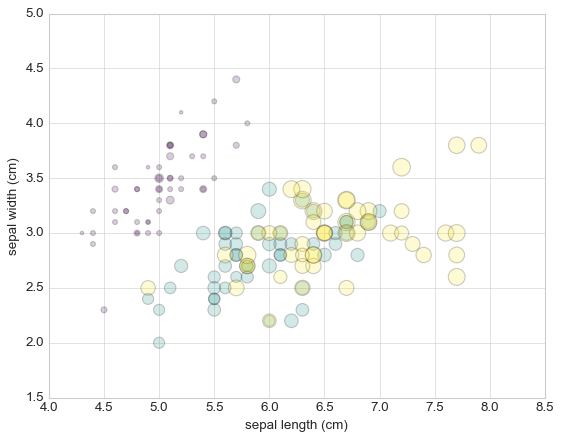

In [66]:
from sklearn.datasets import load_iris
iris = load_iris()
features = iris.data.T

plt.scatter(features[0], features[1], alpha=0.2,
            s=100*features[3], c=iris.target, cmap='viridis')
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1]);

## Visualizing errors
`plt.errorbar()`

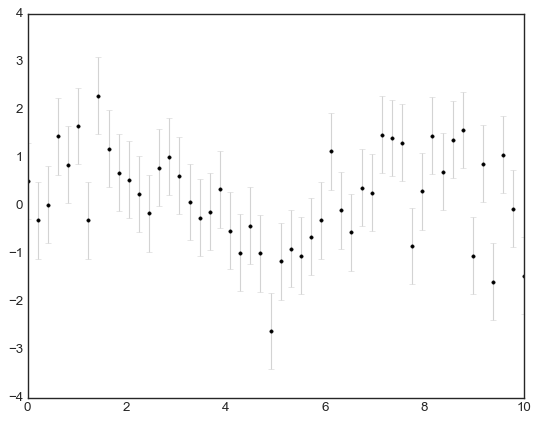

In [69]:
x = np.linspace(0, 10, 50)
dy = 0.8
y = np.sin(x) + dy * np.random.randn(50)

# plt.errorbar(x, y, yerr=dy, fmt='.k');          # fmt has the same effect as things like '-g', ':b' and the like from above
plt.errorbar(x, y, yerr=dy, fmt='.k', 
             ecolor='lightgray');

See [04.03-Errorbars.ipynb](http://localhost:8888/notebooks/PythonDataScienceHandbook-master/notebooks/04.03-Errorbars.ipynb) for more sophisticated examples.

## Histograms
`plt.hist()`

A simple histogram can be a great first step in understanding a dataset.

Simple histograms, with default parameter values in `plt.hist()`:

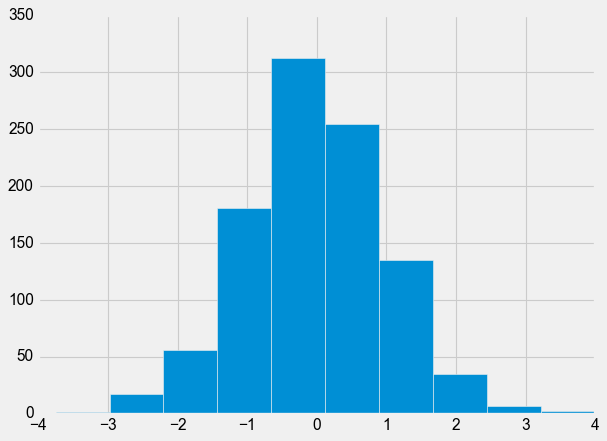

In [73]:
# plt.style.use('seaborn-white')
plt.style.use('fivethirtyeight')

data = np.random.randn(1000)
plt.hist(data);

Using some options in `plt.hist()`:

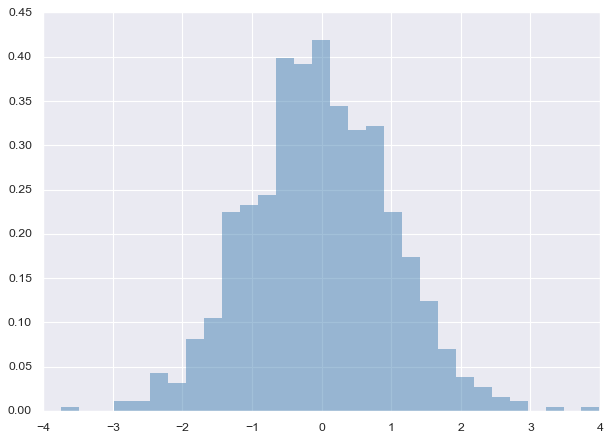

In [84]:
sb.set_theme()

plt.hist(data, bins=30, density=True, alpha=0.5,                   # the 'normed' keyword is deprecated, replaced by 'density'
         histtype='stepfilled', color='steelblue',
         edgecolor='none');

An example from The Beatles dataset:

In [78]:
songs = pd.read_csv('data/The Beatles songs dataset, v2, no NAs.csv')
cols = songs.columns.tolist()
cols

['Title',
 'Year',
 'Album.debut',
 'Duration',
 'Other.releases',
 'Genre',
 'Songwriter',
 'Lead.vocal',
 'Top.50.Billboard']

In [79]:
years = songs['Year']
display(type(years))                   # a Series object
years.head()

pandas.core.series.Series

0    1965
1    1967
2    1964
3    1963
4    1963
Name: Year, dtype: int64

In [80]:
years = years.to_numpy()               # convert Series to NumPy ndarray, since plt.hist() expects a NumPy ndarray argument

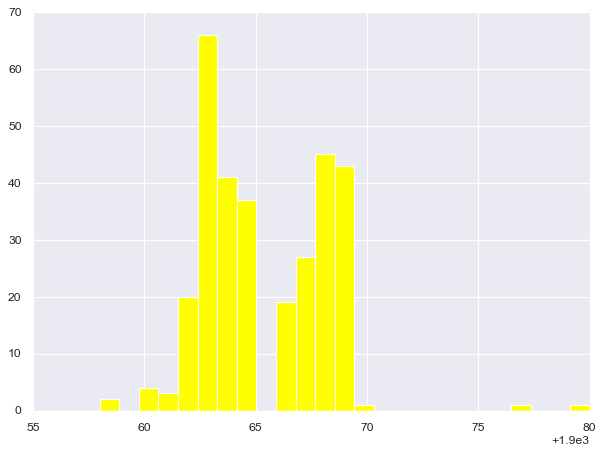

In [88]:
# plt.hist(years);

plt.hist(years, bins=25, color='yellow');
# try varying bins; the 'empty bin' after 1965 is not 1966 (count the righthand-half bins)

In [82]:
len(years[years==1966])

19

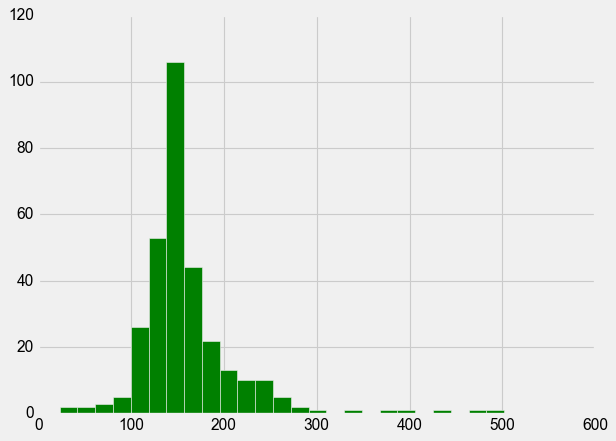

In [83]:
duration = songs['Duration'].to_numpy()
plt.hist(duration, bins=25, color='green');